## **1. UNDESTAND THE DATA**

This Data consist of order data, customer data, and payment data from 2016-2018

In [ ]:
#Importing Libraries
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

#Feature Selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Modelling Algoritm
from sklearn.cluster import KMeans

#Model Evaluation
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
#Load All The Data

order = pd.read_csv('https://docs.google.com/spreadsheets/d/1bvWmvPsnCAQdN0wFLL_4FILHDK6v7pUbb_AC5Sjd1ak/export?format=csv&gid=1982090465')
payment = pd.read_csv('https://docs.google.com/spreadsheets/d/148mQpwyQMjcKa7D1Fzo6w07gLmOtmevJrBJR0aOeUvw/export?format=csv&gid=882307730')
customer = pd.read_csv('https://docs.google.com/spreadsheets/d/1inXJhOJCNlvRLDscs1Bqo2UwTF6uYDcEAiJNlc_6H-I/export?format=csv&gid=1340328169')

In [ ]:
#Combining the data

data_combine = order.merge(payment, how='inner', on ='order_id')
data_combine = data_combine.merge(customer, how='inner', on ='customer_id')

In [ ]:
#percentage of null data of each column

round((data_combine.isnull().sum()/ len(data_combine)*100),2)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.17
order_delivered_carrier_date     1.82
order_delivered_customer_date    3.01
order_estimated_delivery_date    0.00
payment_sequential               0.00
payment_type                     0.00
payment_installments             0.00
payment_value                    0.00
customer_unique_id               0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
dtype: float64

In [ ]:
data_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   payment_sequential             103886 non-null  int64  
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  int64  
 11  payment_value                  103886 non-null  float64
 12  customer_unique_id            

# **2. DATA CLEANING**

## **1.1 Variable Handling (Converting Data Types)**

In [ ]:
#Changing the data type on each column the same to it's data type
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']
for col in date_columns:
    data_combine[col] = pd.to_datetime(data_combine[col], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data_combine.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [ ]:
#Clasify besed on each data type
only_numeric = data_combine.select_dtypes(include=['int', 'float'])
only_object = data_combine.select_dtypes(include=['object'])
only_time = data_combine.select_dtypes(include=['datetime', 'timedelta'])

## **1.2 Duplicate value Handling**

In [ ]:
#Looking for duplicated data
print('Number of duplicated data is: ',data_combine.duplicated().sum())

Number of duplicated data is:  0


## **1.3 Irrelevant Value Handling**

In [ ]:
#Choosing time range between 01-2017 and 08-2018
#Before 01-2017 and after 08-2018 detected unbalanced monthly order number
start_date = "2017-01-01"
end_date = "2018-08-31"

after_start_date = data_combine['order_purchase_timestamp'] >= start_date
before_end_date = data_combine['order_purchase_timestamp'] <= end_date
between_two_dates = after_start_date & before_end_date
data_combine = data_combine.loc[between_two_dates]

## **1.4 Missing Values Handling**

In [ ]:
#Melihat berapa persen data yang kosong pad setiap kolomnya
round((data_combine.isnull().sum()/ len(data_combine)*100),2)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.14
order_delivered_carrier_date     1.76
order_delivered_customer_date    2.95
order_estimated_delivery_date    0.00
payment_sequential               0.00
payment_type                     0.00
payment_installments             0.00
payment_value                    0.00
customer_unique_id               0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
dtype: float64

In [ ]:
#Handling missing data on order_approved_at
missing_1 = data_combine['order_approved_at'] - data_combine['order_purchase_timestamp']
print(missing_1.describe())
print('='*50)
print('Median dari waktu order sampai approved: ',missing_1.median())

#using median
data_combine['order_approved_at']= data_combine['order_approved_at'].fillna(data_combine['order_purchase_timestamp'] + missing_1.median())

count                       103370
mean     0 days 10:13:31.962735803
std      0 days 21:16:32.361399378
min                0 days 00:00:00
25%                0 days 00:12:52
50%                0 days 00:20:18
75%                0 days 14:12:34
max               60 days 10:51:59
dtype: object
Median dari waktu order sampai approved:  0 days 00:20:18


In [ ]:
#Handling missing value on order_delivered_carrier_date
missing_2 = data_combine['order_delivered_carrier_date'] - data_combine['order_approved_at']
print(missing_2.describe())
print('='*50)
print('Median dari waktu apporved sampai dikirim: ',missing_2.median())

#use median
data_combine['order_delivered_carrier_date']= data_combine['order_delivered_carrier_date'].fillna(data_combine['order_approved_at'] + missing_2.median())

count                       101699
mean     2 days 18:39:35.738699495
std      3 days 10:54:41.676342376
min            -172 days +18:44:38
25%         0 days 21:03:01.500000
50%                1 days 19:40:09
75%         3 days 13:26:01.500000
max              125 days 18:18:06
dtype: object
Median dari waktu apporved sampai dikirim:  1 days 19:40:09


In [ ]:
#Handling missing value on order_delivered_customer_date
missing_3 = data_combine['order_delivered_customer_date'] - data_combine['order_delivered_carrier_date']
print(missing_3.describe())
print('='*50)
print('Median dari waktu dikirim sampai diterima customer: ',missing_3.median())

#using median
data_combine['order_delivered_customer_date']= data_combine['order_delivered_customer_date'].fillna(data_combine['order_delivered_carrier_date'] + missing_3.median())

count                       100466
mean     9 days 08:28:40.090348973
std      8 days 18:30:59.503759280
min             -17 days +21:41:31
25%         4 days 02:45:53.750000
50%         7 days 02:35:46.500000
75%        12 days 00:57:23.750000
max              205 days 04:35:00
dtype: object
Median dari waktu dikirim sampai diterima customer:  7 days 02:35:46.500000


## **1.5 Feature Addition**

In [ ]:
#Adding month_order column for monthly analysis
data_combine['Month_order'] = data_combine['order_purchase_timestamp'].dt.to_period('M').astype('str')

In [ ]:
#Adding order_process_time column to get the data of order process time to customer
data_combine['order_process_time'] = data_combine['order_delivered_customer_date'] - data_combine['order_purchase_timestamp']
data_combine['order_process_time'] = data_combine['order_process_time'].dt.days

In [ ]:
#Adding order_delivery_time column to get the data of order delivery time
data_combine['order_delivery_time'] = data_combine['order_delivered_customer_date'] - data_combine['order_delivered_carrier_date']
data_combine['order_delivery_time'] = data_combine['order_delivery_time'].dt.days

In [ ]:
#Adding order_time_accuracy column to analyze delivery punctuality
data_combine['order_accuracy_time'] = data_combine['order_estimated_delivery_date'] - data_combine['order_delivered_customer_date']
data_combine['order_accuracy_time'] = data_combine['order_accuracy_time'].dt.days

In [ ]:
#Adding order_approved_time column to get approved time from ordering time
data_combine['order_approved_time'] = data_combine['order_approved_at'] - data_combine['order_purchase_timestamp']
data_combine['order_approved_time'] = data_combine['order_approved_time'].dt.days

In [ ]:
#Adding day for daily analysis
data_combine['daily_order'] = data_combine['order_purchase_timestamp'].dt.day_name().astype('str')

## **1.6 Outlier Handling**

### 1.6.1 Outlier Handling pada payment value

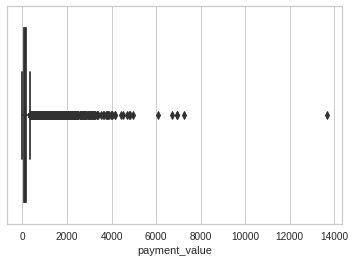

In [ ]:
#Outliers on Monetary
sns.boxplot(x=data_combine["payment_value"])

In [ ]:
def get_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x,75)
    iqr=q3-q1
    batas_bawah = q1 - (iqr*1.5)
    batas_atas = q3 + (iqr*1.5)
    return batas_bawah, batas_atas

In [ ]:
x, y = get_IQR(data_combine["payment_value"])
data_combine = data_combine[(data_combine['payment_value']>x) & (data_combine['payment_value']<y)]
print('batas bawah payment adalah',x)
print('batas bawah payment adalah',y)

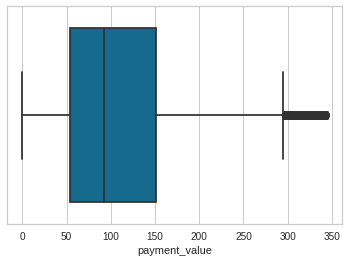

In [ ]:
sns.boxplot(x=data_combine["payment_value"])

### 1.6.2 Outlier Handling pada order_process_time

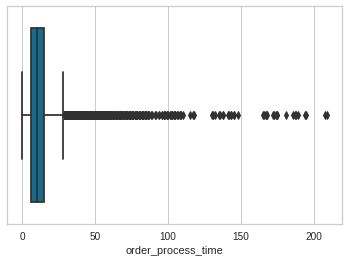

In [ ]:
#Melihat ouliers pada order_process_time
sns.boxplot(x=data_combine["order_process_time"])

In [ ]:
#will be used if any ananlysis regarding this data
#batas_bawah1, batas_atas1 = get_IQR(data_combine['order_process_time'])
#data_combine = data_combine[(data_combine['order_process_time']>batas_bawah1) & (data_combine['order_process_time']<batas_atas1)]

### 1.6.3 Outlier Handling pada order_delivery_time

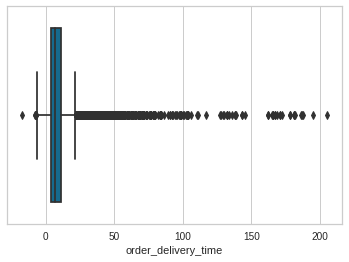

In [ ]:
#Melihat ouliers pada order_delivery_time
sns.boxplot(x=data_combine["order_delivery_time"])

In [ ]:
#will be used if any ananlysis regarding this data
#batas_bawah2, batas_atas2 = get_IQR(data_combine['order_delivery_time'])
#data_combine = data_combine[(data_combine['order_delivery_time']>batas_bawah2) & (data_combine['order_delivery_time']<batas_atas2)]

### 1.6.4 Outlier Handling pada order accuracy time

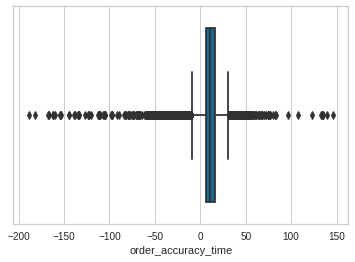

In [ ]:
#Outliers on order_accuracy_time
sns.boxplot(x=data_combine["order_accuracy_time"])

In [ ]:
#batas_bawah3, batas_atas3 = get_IQR(data_combine['order_accuracy_time'])
#data_combine = data_combine[(data_combine['order_accuracy_time']>batas_bawah3) & (data_combine['order_accuracy_time']<batas_atas3)]

### 1.6.5 Outlier Handling pada order approved time

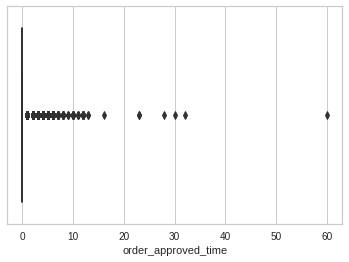

In [ ]:
#Outliers on order_approved_time
sns.boxplot(x=data_combine["order_approved_time"])

In [ ]:
#batas_bawah4, batas_atas4 = get_IQR(data_combine['order_approved_time'])
#data_combine = data_combine[(data_combine['order_approved_time']>batas_bawah4) & (data_combine['order_approved_time']<batas_atas4)]

# **3. EDA**

## **3.1 Evaluate Descriptive Statistic**





In [ ]:
data_combine[['payment_value','order_process_time','order_delivery_time','order_accuracy_time','order_approved_time']].describe()

,payment_value,order_process_time,order_delivery_time,order_accuracy_time,order_approved_time
count,95570.000000,95570.000000,95570.000000,95570.000000,95570.000000
mean,110.025872,11.867961,8.771351,10.870357,0.259715
std,72.733686,9.262559,8.535225,9.964529,0.762954
min,0.000000,0.000000,-17.000000,-189.000000,0.000000
25%,54.000000,6.000000,4.000000,6.000000,0.000000
50%,92.200000,10.000000,7.000000,11.000000,0.000000
75%,150.540000,15.000000,11.000000,16.000000,0.000000
max,344.230000,209.000000,205.000000,146.000000,60.000000


Range

In [ ]:
range_pv = max(data_combine['payment_value'])-min(data_combine['payment_value'])
range_op = max(data_combine['order_process_time'])-min(data_combine['order_process_time'])
range_od = max(data_combine['order_delivery_time'])-min(data_combine['order_delivery_time'])
range_oa = max(data_combine['order_accuracy_time'])-min(data_combine['order_accuracy_time'])
range_ap = max(data_combine['order_approved_time'])-min(data_combine['order_approved_time'])

print('range payment_value = ',range_pv)
print('range order_process_time = ',range_op)
print('range actual_delivery =',range_od)
print('range order_accuracy_time =',range_oa)
print('order_approved_time =',range_ap)

range payment_value =  344.23
range order_process_time =  209
range actual_delivery = 222
range order_accuracy_time = 335
order_approved_time = 60


Variance

In [ ]:
var_pv = statistics.variance(data_combine['payment_value'])
var_op = statistics.variance(data_combine['order_process_time'])
var_od = statistics.variance(data_combine['order_delivery_time'])
var_oa = statistics.variance(data_combine['order_accuracy_time'])
var_ap = statistics.variance(data_combine['order_approved_time'])

print('var of payment_value = ',var_pv)
print('var of order_process_time = ',var_op)
print('var of range actual_delivery =',var_od)
print('var of range order_accuracy_time',var_oa)
print('var of order_approved_time=',var_ap)


var of payment_value =  5290.189098916933
var of order_process_time =  85.79500460957078
var of range actual_delivery = 72.85006182555281
var of range order_accuracy_time 99.29183857561445
var of order_approved_time= 0.582098842288384


Coefficient of variance

In [ ]:
cov_pv = np.std(data_combine['payment_value'])/np.mean(data_combine['payment_value'])
cov_op = np.std(data_combine['order_process_time'])/np.mean(data_combine['order_process_time'])
cov_od = np.std(data_combine['order_delivery_time'])/np.mean(data_combine['order_delivery_time'])
cov_oa = np.std(data_combine['order_accuracy_time'])/np.mean(data_combine['order_accuracy_time'])
cov_ap = np.std(data_combine['order_approved_time'])/np.mean(data_combine['order_approved_time'])

print('coef of variance payment_value = ',cov_pv)
print('coef of variance order_process_time = ',cov_op)
print('coef of variance order_delivery_time = ',cov_od)
print('coef of variance order_accuracy_time = ',cov_oa)
print('coef of variance order_approved_time = ',cov_ap)

coef of variance payment_value =  0.6610563891544999
coef of variance order_process_time =  0.7804635605397336
coef of variance order_delivery_time =  0.9730747596523013
coef of variance order_accuracy_time =  0.9166651163684357
coef of variance order_approved_time =  2.9376388770594897


Skewness

In [ ]:
data_combine[['payment_value','order_process_time','order_delivery_time','order_accuracy_time','order_approved_time']].skew()

payment_value           0.995866
order_process_time      3.758028
order_delivery_time     4.473843
order_accuracy_time    -1.848201
order_approved_time    11.203160
dtype: float64

Kurtosis

In [ ]:
data_combine[['payment_value','order_process_time','order_delivery_time','order_accuracy_time','order_approved_time']].kurtosis()

payment_value            0.486810
order_process_time      37.842943
order_delivery_time     51.384689
order_accuracy_time     27.027019
order_approved_time    510.916758
dtype: float64

## **3.2 Time Series Analysis and Visualization**

### **3.2.1 Monthly Order**

In [ ]:
monthly = data_combine.groupby('Month_order',as_index=False).count()[['order_id','Month_order']]
monthly.head()

,order_id,Month_order
0,754,2017-01
1,1738,2017-02
2,2610,2017-03
3,2353,2017-04
4,3642,2017-05


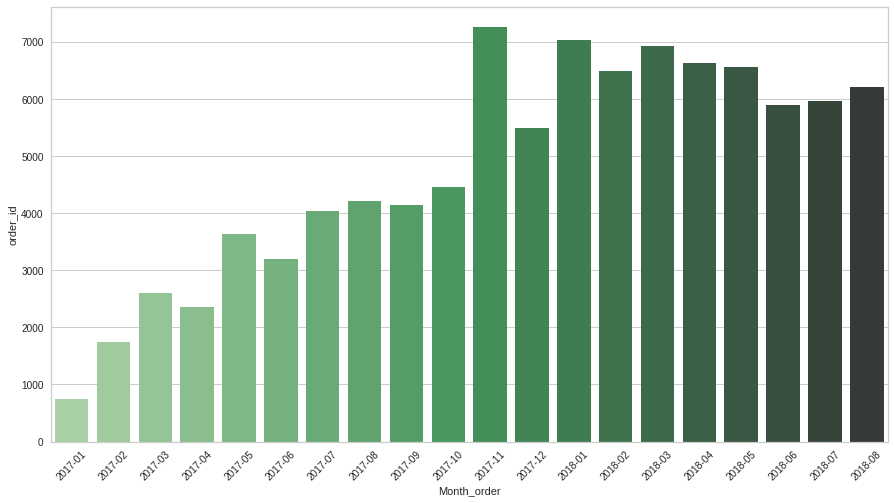

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='Month_order', y='order_id', data=monthly, palette="Greens_d")

### **3.2.2 Daily Order Trends**

In [ ]:
daily_order = data_combine.groupby(['Month_order','daily_order'],as_index=False)[['order_id']].agg('count')

In [ ]:
daily_order2 = daily_order.groupby(['daily_order'],as_index=False)[['daily_order','order_id']].agg('mean')

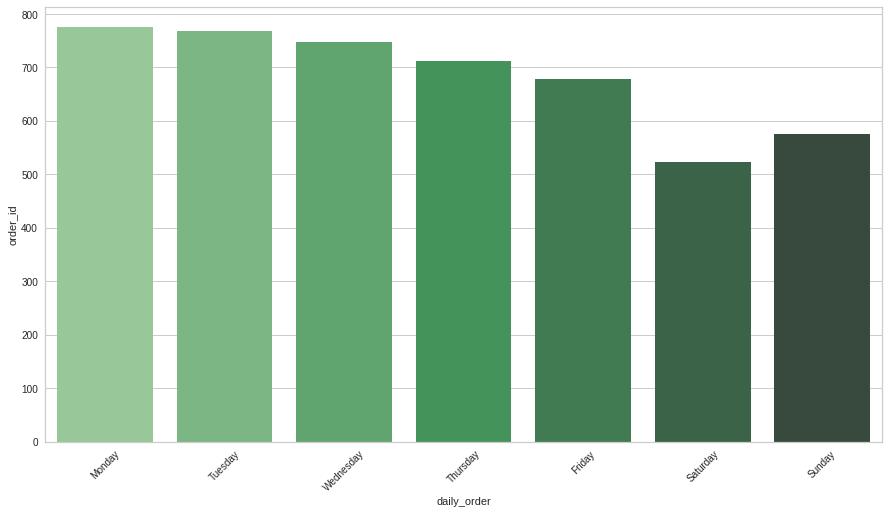

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='daily_order', y='order_id', data=daily_order2, palette="Greens_d", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### **3.2.3 Payment Percentage**

In [ ]:
payment = data_combine.groupby('payment_type',as_index = False)['order_id'].nunique()
payment

,payment_type,order_id
0,boleto,18444
1,credit_card,69801
2,debit_card,1441
3,not_defined,2
4,voucher,3763


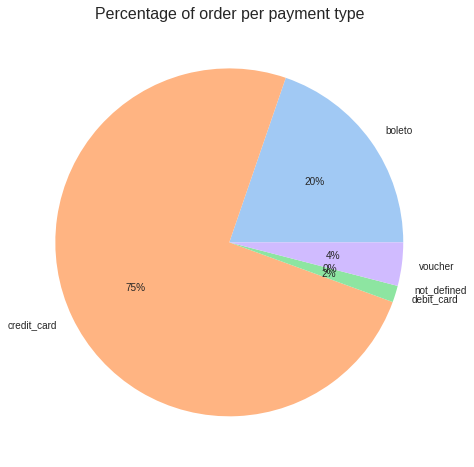

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize = (15,8))

#define data
data = payment['order_id']
labels= payment['payment_type']

#create pie chart
plt.title('Percentage of order per payment type', fontsize=16)
plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

# **4. DATA MODELLING**

## **4.1 RFM Analysis**

RFM analysis is a method used to see patterns in customers based on their buying habits:

1. Recency = When was the last time the customer made a transaction

2. Frequency = How often does the customer make a purchase

3. Monetary = How much the customer spends money

In [ ]:
#earliest and latest purchase
print('Min : {}, Max : {}'.format(min(data_combine.order_purchase_timestamp), max(data_combine.order_purchase_timestamp)))

Min : 2017-01-05 11:56:06, Max : 2018-08-30 15:11:58


In [ ]:
#Calculate RFM
import datetime as dt
pin_date = max(data_combine.order_purchase_timestamp) + dt.timedelta(1)

#dataframe RFM
rfm = data_combine.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x: (pin_date - x.max()).days,
    'order_id' : 'count',
    'payment_value' : 'sum'})

#rename columns
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency',
                      'order_id' : 'Frequency',
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


## **4.2 Outlier Handling**

In [ ]:
#Kita akan menggunakan Inter Quartile Range untuk menangani ouliers
#Menentukan Limit
def limit(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1

    #menentukan upper limit biasa dan upper limit ekstim
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.5) + (IQR * 3)
    print('Lower Limit:', lower_limit)
    print('Lower Limit Extreme:', lower_limit_extreme)
    print('Upper Limit:', upper_limit)
    print('Upper Limit Extreme:', upper_limit_extreme)

#Mengitung persen outliers dari data
def percent_outliers(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1

    #menentukan upper limit biasa dan upper limit ekstim
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.95) + (IQR * 3)
    #melihat persenan outliers terhadap total data
    print('Lower Limit: {} %'.format(rfm[(rfm[i] >= lower_limit)].shape[0]/ rfm.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(rfm[(rfm[i] >= lower_limit_extreme)].shape[0]/rfm.shape[0]*100))
    print('Upper Limit: {} %'.format(rfm[(rfm[i] >= upper_limit)].shape[0]/ rfm.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(rfm[(rfm[i] >= upper_limit_extreme)].shape[0]/rfm.shape[0]*100))

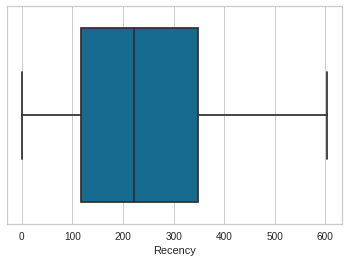

In [ ]:
# Recency Outliers
sns.boxplot(x=rfm["Recency"])

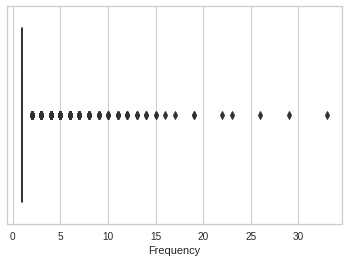

In [ ]:
#Frequency Outliers
sns.boxplot(x=rfm["Frequency"])

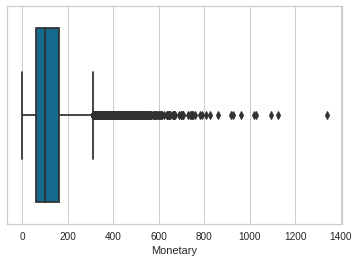

In [ ]:
#Monetary Outliers
sns.boxplot(x=rfm["Monetary"])

In [ ]:
print(limit('Monetary'))
print('-'*50)
print(percent_outliers('Monetary'))

Lower Limit: -164.36799999999988
Lower Limit Extreme: -428.41599999999977
Upper Limit: 539.7599999999998
Upper Limit Extreme: 627.7759999999998
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.0962442111937679 %
Upper Limit Extereme: 0.012455133213311141 %
None


In [ ]:
#Outliers handling on Monetary
outliers1_drop = rfm[(rfm['Monetary'] > 1500)].index
rfm.drop(outliers1_drop, inplace=True)

## **4.3 Data Scaling**

In [ ]:
#Data scaler
scaler = StandardScaler()

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:
rfm_scaled = scaler.fit_transform(rfm.astype(float))

In [ ]:
#DataFrame for scaled data
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.833644,-0.173554,0.292570
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.813801,-0.173554,-1.176924
0000f46a3911fa3c0805444483337064,1.977417,-0.173554,-0.420719
0000f6ccb0745a6a4b88665a16c9f078,0.548736,-0.173554,-0.966447
0004aac84e0df4da2b147fca70cf8255,0.330466,-0.173554,0.997021


## **4.5 K-means clustering**

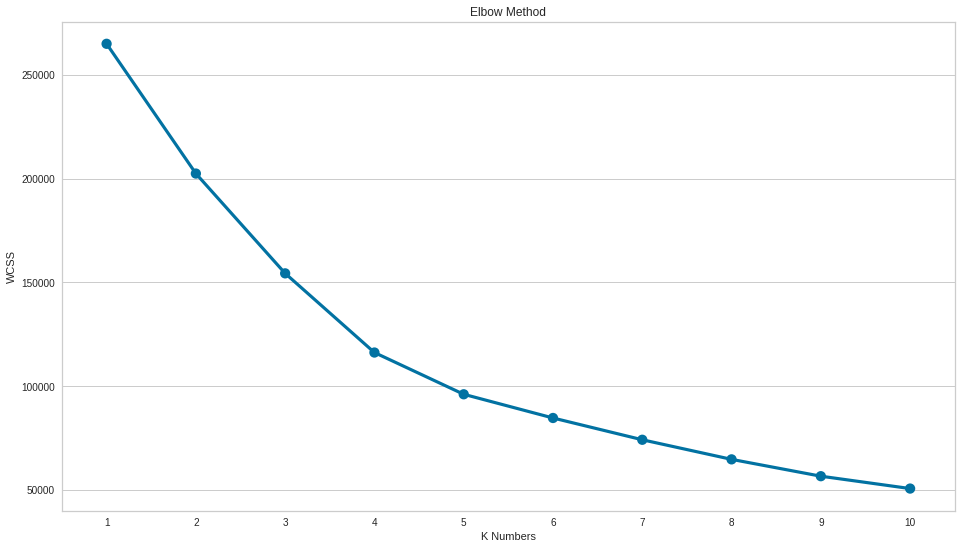

In [ ]:
#Elbow method
wcss = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_

#Visualisasi Elbow Method
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Choose n_clusters = 3
clus = KMeans(n_clusters= 3, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(n_clusters=3)

In [ ]:

rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,K_Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,2
0000f46a3911fa3c0805444483337064,538,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,0


## **4.6 Analysis**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


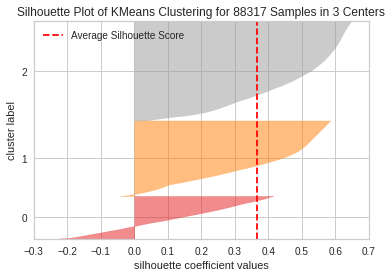

In [ ]:
#Visualisasi Silhouette Analysis
visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled)
visualizer.poof()

## **4.7 Visualization**

In [ ]:
rfm.groupby('K_Cluster')['Recency','Frequency','Monetary'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Recency                              Frequency                       \
            count        mean median  max  min     count      mean median max   
K_Cluster                                                                       
0           17406  217.934793  209.0  602    2     17406  1.271918    1.0  33   
1           30657  395.780344  387.0  603  258     30657  1.042144    1.0   5   
2           40254  128.788543  129.0  267    1     40254  1.030506    1.0   4   

              Monetary                                      
          min    count        mean  median      max    min  
K_Cluster                                                   
0           1    17406  240.385927  227.31  1338.41  19.00  
1           1    30657   92.210502   83.25   263.04  10.07  
2           1    40254   87.050176   81.14   194.70   0.00

In [ ]:
#Membuat label berdasarkan cluster
rfm_reset = rfm.reset_index()
count = rfm_reset.groupby('K_Cluster')['customer_unique_id'].nunique().reset_index()
count['label']=['Gold','Bronze','Sliver']
count

,K_Cluster,customer_unique_id,label
0,0,17406,Gold
1,1,30657,Bronze
2,2,40254,Sliver


Text(0, 0.5, 'Amount of Customer')

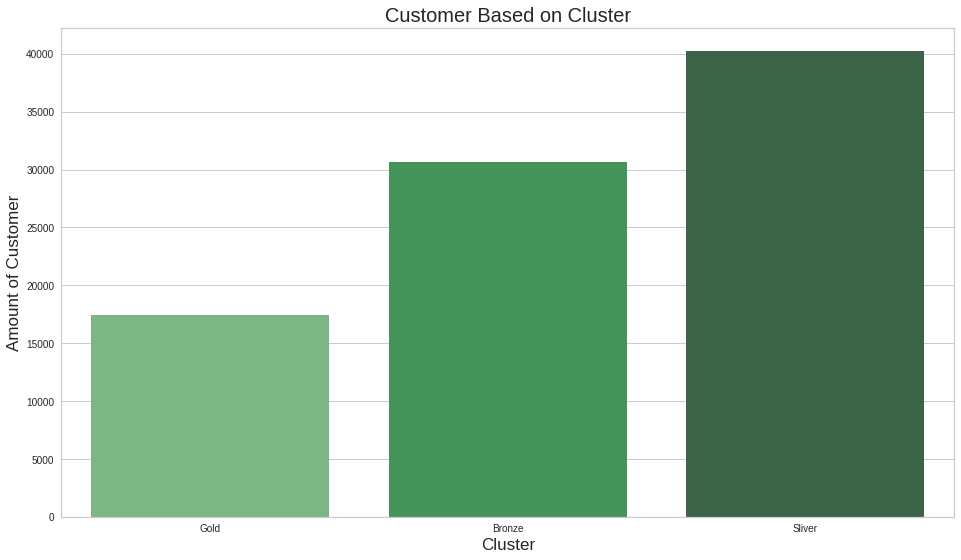

In [ ]:
#Visualisasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=count['customer_unique_id'], x=count['label'], palette="Greens_d")
plt.title('Customer Based on Cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=17)
plt.ylabel('Amount of Customer',fontsize=17)

## **4.8 Conclusion**

1. Bronze: Customers who don't make purchases very often and the transaction nominal is low, but the last time he made a transaction was fast. There are 30657 subscribers of this type.
    - Action: You can try it by giving a discount or offer with an affordable nominal so that the conversion rate increases because the number of customers in the Bronze category is quite large
2. Silver: Customers who make purchases quite often and the transaction nominal is quite high, but the last time he made a transaction was quite long. There are 40254 subscribers of this type.
    - Action: Given a combination of discounts and post-transaction campaigns to increase purchases by using a personalized email that can give a personal approach.
3. Gold: Customers who frequently shop and have a large number of transactions, but the last transaction time is long. There are 17406 subscribers of this type.
    - Action: More often given a campaign after making a transaction to make a purchase again. It could also be by giving rewards because they make transactions more often and the nominal is high.